In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Cantor

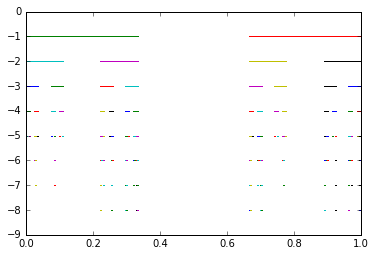

In [2]:
def cantor_normal(a, b):
    return [a, 2*a/3+b/3, a/3+2*b/3, b]

def otro_cantor(a, b):
    return [a, 3*a/4+b/4, a/4+3*b/4, b]

cantor = cantor_normal

def itera(a, b, h, n):
    if n > 0:
        c = cantor(a, b)
        itera(c[0], c[1], h, n-1)
        itera(c[2], c[3], h, n-1)
    else:
        plt.plot([a, b], [h, h])

for h in range(10):
    itera(0, 1, -h, h)

# Koch

In [3]:
def sig(a, b, p=1/2):
    """ Devuelve el punto a*(1-p)+b*p, a y b son puntos. """
    return a*(1-p)+ b*p

def rot(a, ang=90):
    theta = np.radians(ang)
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    return np.array((R@a.T)[0])[0]

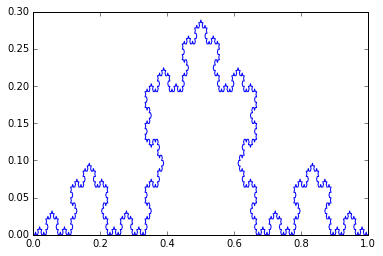

In [4]:
def _koch(a, b, n):
    c = (b-a)/3 + a  # vector a un tercio de dist de a a b
    e = (b-a)*2/3 + a  # a dos tercios
    d = rot(e - c, 60) + c  # ce rotado 60º
    if n > 0:
        return np.append(np.array([]), [_koch(a, c, n-1), _koch(c, d, n-1), _koch(d, e, n-1), _koch(e, b, n-1)])
    else:
        return np.array([a])

def koch(a, b, n):
    k = _koch(a, b, n)
    x = np.append(k[::2], b[0])  # agrega b a la lista
    y = np.append(k[1::2], b[1])
    plt.plot(x,y)

koch(np.array((0, 0)), np.array((1, 0)), 5)

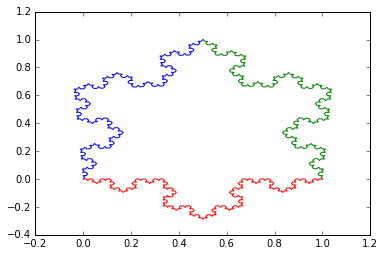

In [5]:
a=np.array((0,0))
b=np.array((.5,1))
c=np.array((1,0))

koch(a, b, 4)
koch(b, c, 4)
koch(c, a, 4)

# Sierpinski

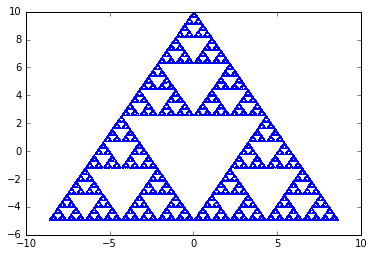

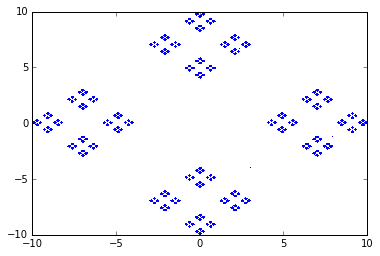

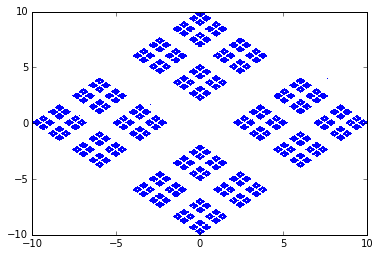

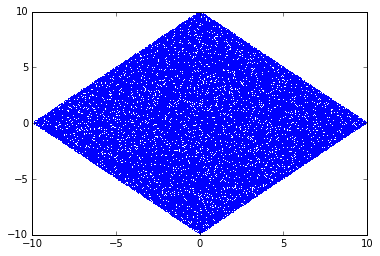

In [6]:
def juego_del_caos(nvertices, razon=0.5):
    ang = np.linspace(np.pi/2, 5*np.pi/2, nvertices+1) # vert equidistantes sobre circunferencia
    vx = 10 * np.cos(ang)  # polares a rectangulares
    vy = 10 * np.sin(ang)
    x = [10]  # orbita
    y = [10]
    R = np.random.randint(0, nvertices, 100000)  # vértices a tomar al azar
    for r in R:
        xy = np.array((x[-1], y[-1]))
        vr = np.array((vx[r], vy[r]))
        s = sig(xy, vr, razon)  # siguiente elem de la órbita
        x.append(s[0])
        y.append(s[1])
    plt.plot(x, y, ',')
    plt.show()
    
juego_del_caos(3)
juego_del_caos(4, .7)
juego_del_caos(4, .6)
juego_del_caos(4, .5)

# Ramas

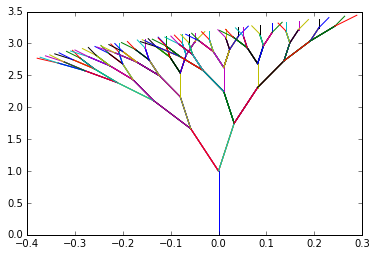

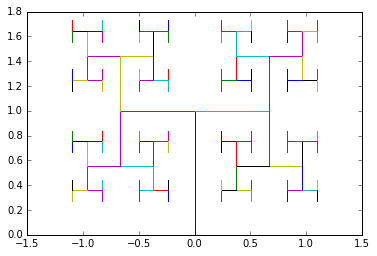

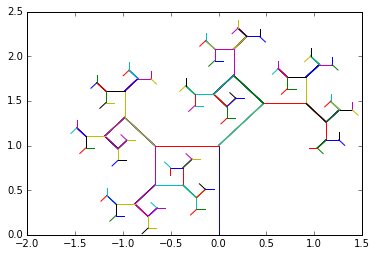

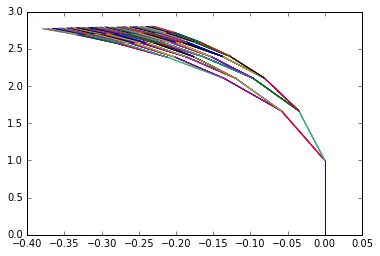

In [25]:
def _rama(b, n, esc1, esc2, ang1, ang2):
    nuevas = []
    for _ in range(n):
        for i in range(int(len(b)/2)-1, len(b), 2):
            x, y = b[i], b[i+1]
            z = rot((y-x)*esc1, ang1) + y
            w = rot((y-x)*esc2, ang2) + y
            nuevas.extend([y, z, y, w])
        b.extend(nuevas)
    return b

def rama(n, esc1=2/3, esc2=2/3, ang1=15, ang2="nada"):
    if ang2=="nada":
        ang2=-ang1
    r = _rama([np.array([0,0]), np.array([0,1])], n, esc1, esc2, ang1, ang2)
    for i in range(0, len(r), 2):
        plt.plot([r[i][0], r[i+1][0]], [r[i][1], r[i+1][1]])
    plt.show()
    
rama(6, esc1=2/3, esc2=3/4, ang1=5, ang2=-2.5)
rama(6, ang1=90)
rama(6, ang1=90, ang2=-45)
rama(6, ang1=5, ang2=3)